In [11]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
from scipy.stats import pearsonr


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teslaFrame = pd.read_csv('TSLA.csv')

In [3]:
teslaFrame.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-02-14,23.639999,25.49,22.559999,23.180000,23.180000,11341000
1,2011-02-21,22.879999,23.85,21.110001,23.610001,23.610001,6071800
2,2011-02-28,23.740000,24.99,23.500000,24.950001,24.950001,5041200
3,2011-03-07,24.930000,25.40,23.530001,24.070000,24.070000,6306100
4,2011-03-14,23.820000,24.00,21.799999,22.959999,22.959999,5265000


In [4]:
print("Max date: "+np.max(teslaFrame.Date))
print("Min date: "+np.min(teslaFrame.Date))

Max date: 2018-02-12
Min date: 2011-02-14


In [5]:
sp500 = pd.read_csv('GSPC.csv')

In [6]:
#Переконалися, що дані S&P за той самий період
print("Max date: "+np.max(sp500.Date))
print("Min date: "+np.min(sp500.Date))

Max date: 2018-02-12
Min date: 2011-02-14


In [7]:
x = (sp500.High+sp500.Low)/2.0
y = (teslaFrame.High+teslaFrame.Low)/2.0

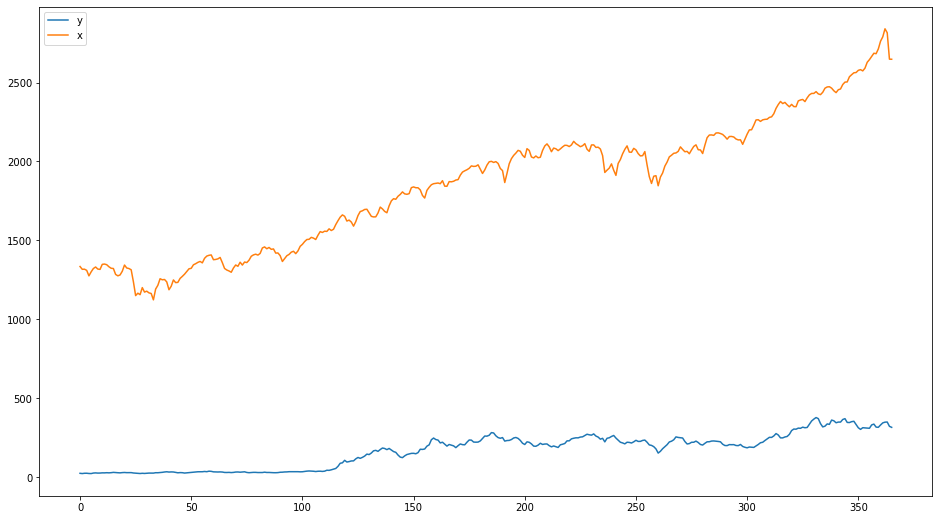

In [8]:
#Відобразимо x та y на графіку
plt.figure(figsize=(16, 9))
plt.plot(y, label='y')
plt.plot(x, label='x')
plt.legend()

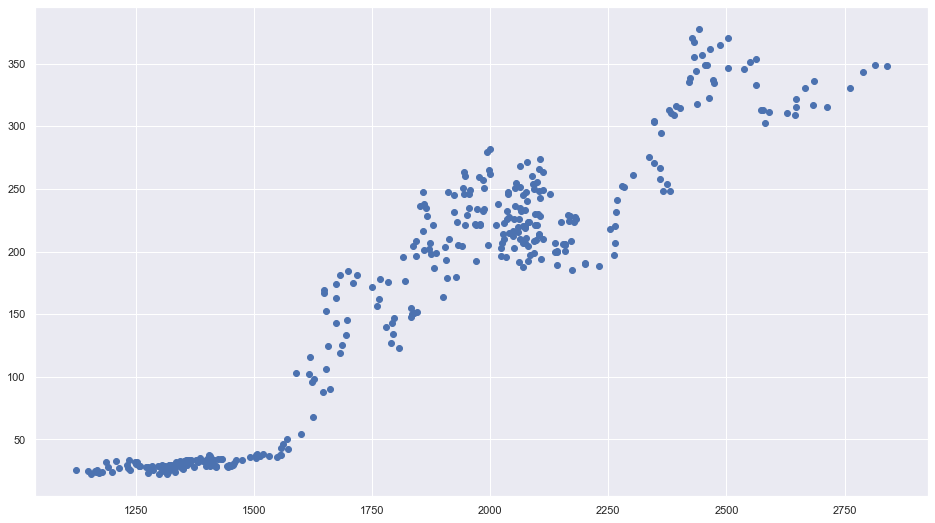

In [36]:
plt.figure(figsize=(16, 9))
plt.scatter(x,y)

Використовуючи комп'ютерне програмне забезпечення для виконання регресійних розрахунків
𝑥=𝑟 , 𝑦=𝑟 𝑚𝑝
(B)
(C) (D)
оцініть за допомогою регресії (1) параметри 𝑏0 і 𝑏1, 𝑏2 для компанії.

const   -455.708146
x1         0.432835
x2        -0.000050
dtype: float64


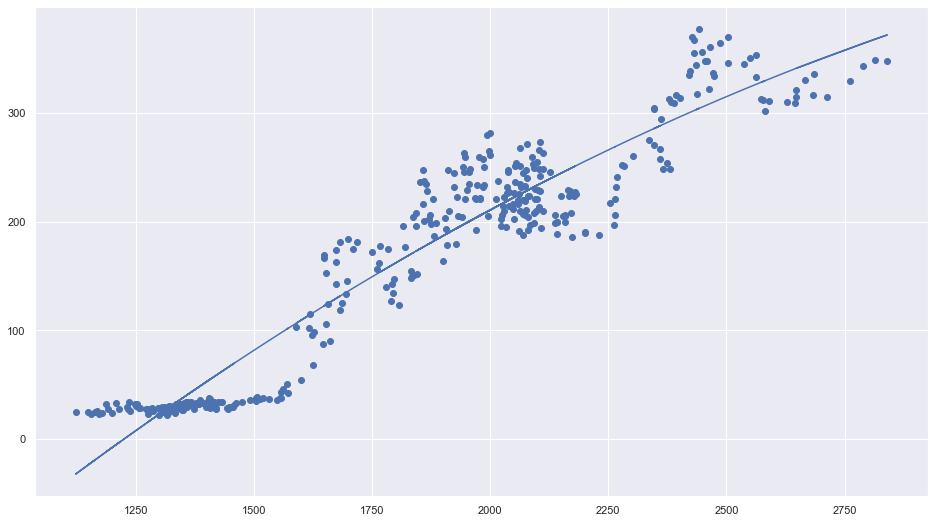

In [37]:
features = PolynomialFeatures(2)
xp = features.fit_transform(np.reshape(np.array(x),(-1,1)))
model = sm.OLS(y,xp).fit()
y_preds = model.predict(xp)
print(model.params)
plt.figure(figsize=(16, 9))
plt.scatter(x,y)
plt.plot(x,y_preds);

In [38]:
def calcR(x,y):
    return (np.cov(x,y)/(np.sqrt(np.var(x)*np.var(y))))[0][1]
def SSE(y,y_pred):
    sse = 0
    for k in range(len(y)):
        sse+=((y[k]-y_pred[k])**2)
    return sse
def SSR(y_pred,y_mean):
    ssr = 0
    for k in range(len(y_pred)):
        ssr+=((y_pred[k]-y_mean)**2)
    return ssr
def SST(ssr,sse):
    return ssr+sse
def calcR_sq(x,y,y_pred):
    ssr = SSR(y_pred,np.mean(y))
    sse = SSE(y,y_pred)
    return ssr/SST(ssr,sse)
def F(x,y,y_pred): 
    n = len(x)
    m = 1
    F_ch = 0
    y_pred_mean = np.mean(y_pred)
    for k in y_pred:
        F_ch+=(k-y_pred_mean)**2
    F_zn = 0
    for k in range(len(y)):
        F_zn+=(y[k]-y_pred[k])**2
    F = (F_ch/m)*((n-m-1)/F_zn)
    return F
def calcAlphaBetaPreds(x,y):
    beta = sum((x - np.mean(x)) * (y - np.mean(y))) / (len(x) * np.std(x)** 2)
    alpha = np.mean(y) - beta * np.mean(x)
    preds = []
    for k in x:
        preds.append(alpha+beta*k)
    return alpha,beta,preds

Зробіть повний характеристичний аналіз для моделі;

In [47]:
print("r: {}, R**2: {}, F: {}".format(calcR(x,y),calcR_sq(x,y,y_preds),F(x,y,y_preds)))

r: 0.9550658372608375, R**2: 0.9139882526064448, F: 3867.9800612174786


In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1929.
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          4.19e-194
Time:                        15:55:01   Log-Likelihood:                -1779.2
No. Observations:                 366   AIC:                             3564.
Df Residuals:                     363   BIC:                             3576.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -455.7081     31.812    -14.325      0.000    -518.268    -393.148
x1             0.4328      0.035     12.386      0.000       0.364       0.502
x2         -4.977e-05   9.28e-06     -5.363      0.000    -6.8e-05   -3.15e-05
==============================================================================
Omnibus:                       12.655   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.881
Skew:                           0.131   Prob(JB):                       0.0320
Kurtosis:                       2.382   Cond. No.                     7.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Побудувати довірчий діапазон для регресійних значень 𝑦̂ (з рівнем довіри 95%);

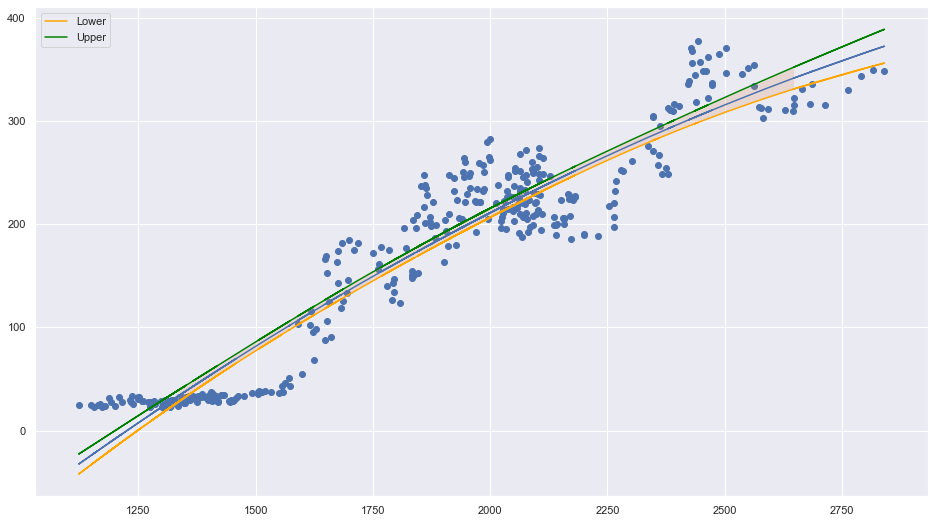

In [50]:
low, up = summary_table(model, alpha = 0.05)[1][:, 4:6].T

plt.figure(figsize=(16,9))

plt.plot(x,y_preds)
plt.scatter(x,y)

plt.plot(x, low,c='orange',label='Lower')
plt.plot(x, up,c='green',label='Upper')
plt.fill_between(x,low,up,alpha=0.2)
plt.legend()